Starter file for Project 1 - need to load in Spotify CSV!


In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
csv_path = Path("Resources/spotify-2023.csv")

spotify_df = pd.read_csv(csv_path, encoding='iso-8859-1')

#Basic Dataframe with all information
spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,artist_count,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# David!

In [4]:
# DF of just the artist names
artist_df = spotify_df[["Artist Name 1", "Artist Name 2","Artist Name 3", "Artist Name 4",
                        "Artist Name 5", "Artist Name 6", "Artist Name 7", "Artist Name 8"]]
artist_df.head()

,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8
0,Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN
1,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#bucket to store the artists names as a list
artist_list = []

#columns into lists and drop the NA values
artist1_list = artist_df["Artist Name 1"].dropna().tolist()
artist2_list = artist_df["Artist Name 2"].dropna().tolist()
artist3_list = artist_df["Artist Name 3"].dropna().tolist()
artist4_list = artist_df["Artist Name 4"].dropna().tolist()
artist5_list = artist_df["Artist Name 5"].dropna().tolist()
artist6_list = artist_df["Artist Name 6"].dropna().tolist()
artist7_list = artist_df["Artist Name 7"].dropna().tolist()
artist8_list = artist_df["Artist Name 8"].dropna().tolist()

#compile the lists
artist_list.extend(artist1_list)
artist_list.extend(artist2_list)
artist_list.extend(artist3_list)
artist_list.extend(artist4_list)
artist_list.extend(artist5_list)
artist_list.extend(artist6_list)
artist_list.extend(artist7_list)
artist_list.extend(artist8_list)

artist_list

['Latto',
 'Myke Towers',
 'Olivia Rodrigo',
 'Taylor Swift',
 'Bad Bunny',
 'Dave',
 'Eslabon Armado',
 'Quevedo',
 'Gunna',
 'Peso Pluma',
 'Bad Bunny',
 'NewJeans',
 'Miley Cyrus',
 'David Kushner',
 'Harry Styles',
 'SZA',
 'Fifty Fifty',
 'Billie Eilish',
 'Feid',
 'Jimin',
 'Gabito Ballesteros',
 'Taylor Swift',
 'Arctic Monkeys',
 'Bizarrap',
 'The Weeknd',
 'Fuerza Regida',
 'Rema',
 'Tainy',
 'Morgan Wallen',
 'Dua Lipa',
 'Troye Sivan',
 'Peso Pluma',
 'The Weeknd',
 'Taylor Swift',
 'Karol G',
 'Big One',
 'Yahritza Y Su Esencia',
 'Taylor Swift',
 'Taylor Swift',
 'Fuerza Regida',
 'Junior H',
 'Post Malone',
 'Bebe Rexha',
 'Tyler',
 'Nicki Minaj',
 'Miley Cyrus',
 'OneRepublic',
 'The Weeknd',
 'The Weeknd',
 'Ariana Grande',
 'Feid',
 'David Guetta',
 'Karol G',
 'Peggy Gou',
 'Tom Odell',
 'The Weeknd',
 'Kali Uchis',
 'Manuel Turizo',
 'Karol G',
 'Taylor Swift',
 'dennis',
 'PinkPantheress',
 'Charlie Puth',
 'Rauw Alejandro',
 'Ozuna',
 'Chris Molitor',
 'Taylor Swif

In [6]:
# Number of artists in the sample
print(len(artist_list))

1482


In [7]:
# Number of songs in the sample
counter = 0
for row in spotify_df["track_name"]:
   counter = counter + 1
counter   

952

In [8]:
# DF of the full artist list
all_artists_df = pd.DataFrame(artist_list)
all_artists_df.head()

,0
0,Latto
1,Myke Towers
2,Olivia Rodrigo
3,Taylor Swift
4,Bad Bunny


In [9]:
# Unique artists in the sample
print(len(all_artists_df.value_counts()))

803


In [10]:
# Sorted by most common
sorted_df = all_artists_df.value_counts().sort_values(ascending=False)
sorted_df.head(10)

Taylor Swift      36
The Weeknd        34
Bad Bunny         26
SZA               23
Kendrick Lamar    23
Drake             19
Harry Styles      17
Feid              15
 Bad Bunny        15
Ed Sheeran        13
Name: count, dtype: int64

In [11]:
count_sorted_df = pd.DataFrame(sorted_df)
count_sorted_df.head(10)

,count
0,
Taylor Swift,36
The Weeknd,34
Bad Bunny,26
SZA,23
Kendrick Lamar,23
Drake,19
Harry Styles,17
Feid,15
Bad Bunny,15


In [12]:
fifteen_df = count_sorted_df.loc[(count_sorted_df["count"] >= 15)]
fifteen_df

,count
0,
Taylor Swift,36
The Weeknd,34
Bad Bunny,26
SZA,23
Kendrick Lamar,23
Drake,19
Harry Styles,17
Feid,15
Bad Bunny,15


<BarContainer object of 9 artists>

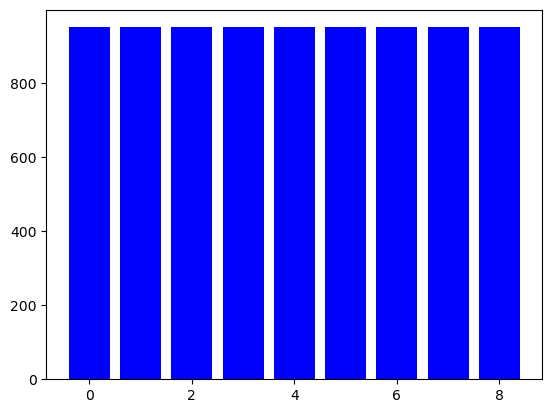

In [18]:
# bar chart - maybe? make this ok
x_axis = np.arange(len(fifteen_df))
plt.bar(x_axis, counter, color="b", align="center")

In [19]:
# pie chart - maybe?

# sizes = 

# plt.pie(sizes, explode=None, labels=None, colors=None,
#         shadow=True)
# plt.show()


In [ ]:
#Austin!

In [ ]:
#Dan